In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.species.unique()
setosa_df = df[(df['species'] == 'setosa')]
versicolor_df = df[(df['species'] == 'versicolor')]
virginica_df = df[(df['species'] == 'virginica')]

In [4]:
print(setosa_df.describe())
print(versicolor_df.describe())
print(virginica_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.936000          2.770000        

In [5]:
import matplotlib.pyplot as plt

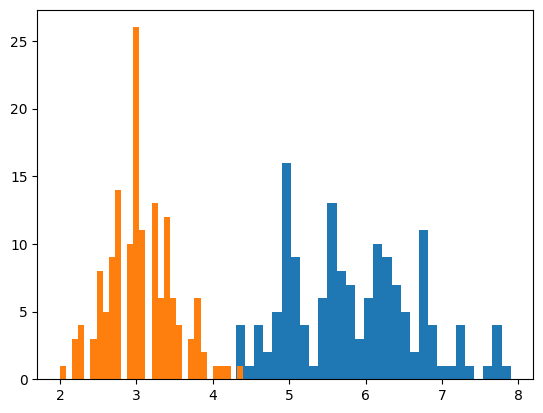

In [6]:
plt.hist(df['sepal length (cm)'], bins=30)
plt.hist(df['sepal width (cm)'], bins=30)
plt.show()

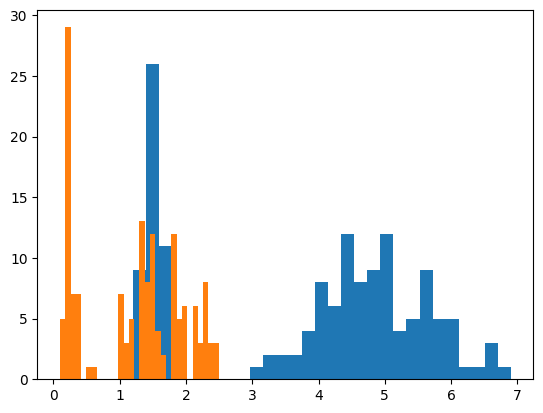

In [7]:
plt.hist(df['petal length (cm)'], bins=30)
plt.hist(df['petal width (cm)'], bins=30)
plt.show()

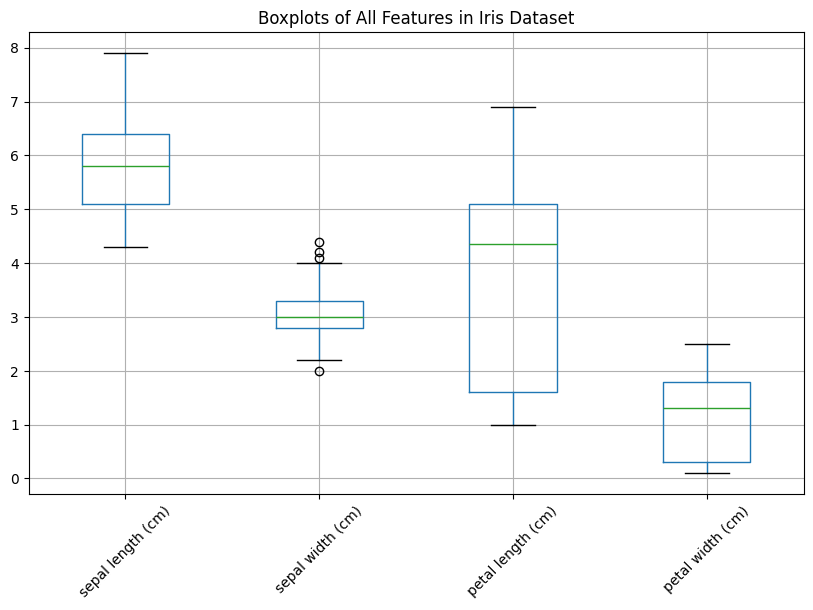

In [8]:
# Visualizing outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplots of All Features in Iris Dataset")
plt.xticks(rotation=45)
plt.show()


In [9]:
import seaborn as sns

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

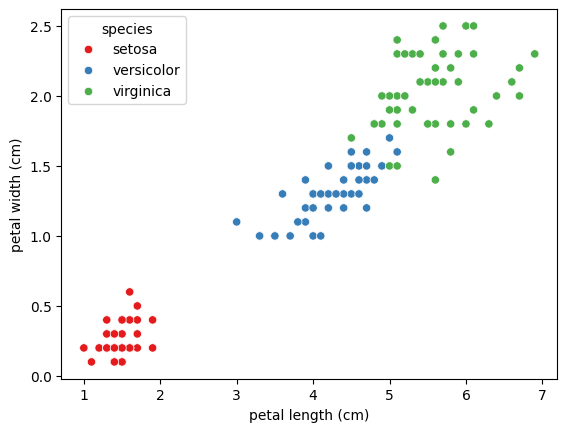

In [10]:
# Scatter plots for visualizing grouping
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='species', palette="Set1")

In [11]:
# Hypothesis testing
# Hypothesis: Sepal length of setosa and vericolor are similiar
import scipy.stats as sc

setosa_sepal_len = setosa_df['sepal length (cm)']
versicolor_sepal_len = versicolor_df['sepal length (cm)']
virginica_sepal_len = virginica_df['sepal length (cm)']

t_val, p_val = sc.ttest_ind(setosa_sepal_len, versicolor_sepal_len)

print(t_val)
print(p_val)

-10.52098626754911
8.985235037487079e-18


# Co-relation and covarience

In [15]:
corr, p_val = sc.pearsonr(df['sepal length (cm)'], df['petal length (cm)'])

print(f'Pearson\'s result: {corr}')
print(f'P-value : {p_val}')

# A smaller p-value and larger corr suggests a strong reln. btween sepal and petal length of flowers

Pearson's result: 0.8717537758865831
P-value : 1.0386674194498828e-47


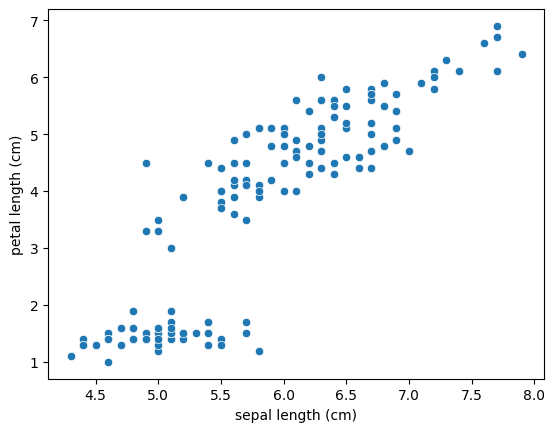

In [16]:
# Scatter plot to confirm same
sns.scatterplot(x = 'sepal length (cm)', y = 'petal length (cm)', data = df)
plt.show()

In [18]:
# Let's check reln. between widths

corr, p_val = sc.pearsonr(df['sepal width (cm)'], df['petal width (cm)'])

print(f'Pearson\'s result: {corr}')
print(f'P-value : {p_val}')

# A smaller p-value and smaller (-ve as well) corr suggests a weak reln. btween sepal and petal length of flowers

Pearson's result: -0.36612593253643905
P-value : 4.073228513246201e-06


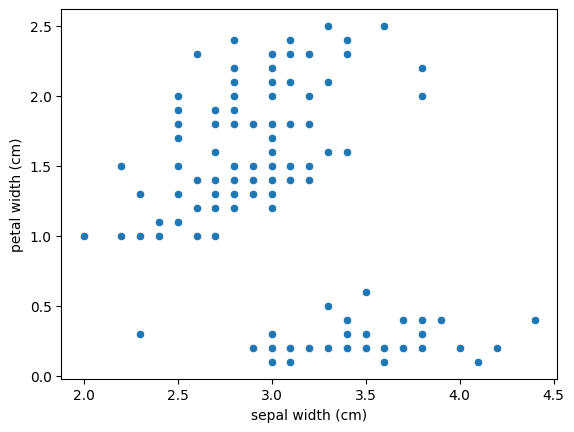

In [19]:
# Scatter plot to confirm same
sns.scatterplot(x = 'sepal width (cm)', y = 'petal width (cm)', data = df)
plt.show()

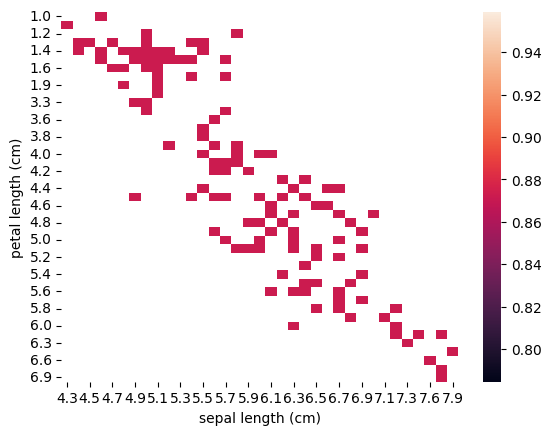

In [35]:
# Lets analyse the same using heatmaps

df['corr_pos'] = df.apply(lambda x: sc.pearsonr(df['sepal length (cm)'], df['petal length (cm)'])[0], axis=1)
pivot_table = df.pivot_table(index = 'petal length (cm)', columns = 'sepal length (cm)', values = 'corr_pos')

sns.heatmap(pivot_table)
plt.show()

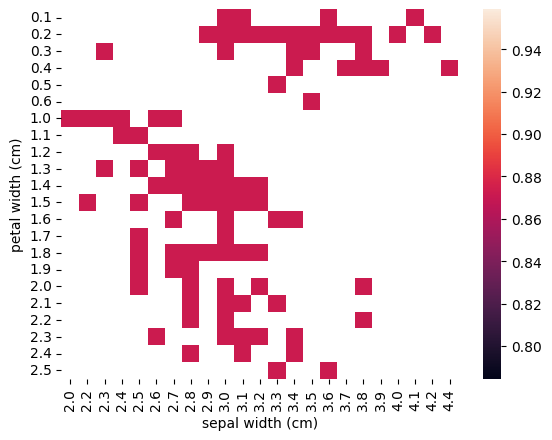

In [36]:
# Lets analyse the same using heatmaps

df['corr_neg'] = df.apply(lambda x: sc.pearsonr(df['sepal width (cm)'], df['petal width (cm)'])[0], axis=1)
pivot_table = df.pivot_table(index = 'petal width (cm)', columns = 'sepal width (cm)', values = 'corr_pos')

sns.heatmap(pivot_table)
plt.show()